# Join Accidents and Vehicles

We get sex, age against datetime and details of accidents.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# ctrl B for the inline tmp-run box

FIGSIZE = (12,8)

In [37]:
dfa = pd.read_csv("DfTRoadSafety_Accidents_2014.csv")
#dfa = dfa[:10000]
dfa['freq'] = 1
# get string Date and Time cols and set the Index as a DateTime object
datetime_ser = dfa.apply(lambda x: x.Date + " " + x.Time, axis=1)
dfa = dfa.set_index(pd.to_datetime(datetime_ser, dayfirst=True))
del dfa['Date']
del dfa['Time']
dfa.head()

,﻿Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,freq
2014-01-09 13:21:00,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,5,...,0,1,2,2,0,0,1,2,E01002814,1
2014-01-20 23:00:00,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,2,...,5,7,1,1,0,0,1,2,E01002894,1
2014-01-21 10:40:00,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,3,...,0,1,1,1,0,0,1,1,E01002822,1
2014-01-15 17:45:00,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,4,...,1,4,1,1,0,0,1,2,E01002812,1
2014-01-09 08:50:00,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,5,...,8,1,1,1,0,0,1,1,E01002821,1


In [38]:
dfv=pd.read_csv("DfTRoadSafety_Vehicles_2014.csv")
print("Read {} rows".format(dfv.shape))
dfv = dfv#[:10000]
dfv['freq'] = 1
dfv.head()

Read (268527, 22) rows


,﻿Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,freq
0,201401BS70001,1,8,0,18,0,0,0,0,0,...,1,1,49,8,1997,2,2,4,1,1
1,201401BS70001,2,19,0,15,0,0,0,0,0,...,6,1,-1,-1,4249,2,2,-1,-1,1
2,201401BS70002,1,9,0,2,0,1,0,0,0,...,6,1,-1,-1,6750,1,12,-1,-1,1
3,201401BS70002,2,1,0,14,0,1,0,4,0,...,6,2,27,6,-1,-1,-1,-1,-1,1
4,201401BS70003,1,9,0,9,0,5,0,0,0,...,6,1,49,8,1598,1,4,1,1,1


In [68]:
keys = '﻿Accident_Index' # 

dfa_idx =dfa.reset_index().set_index(keys)
dfv_idx = dfv.reset_index().set_index(keys)

dfav = dfa_idx.join(dfv_idx, how="left", rsuffix="dfv")

#dfav = dfa.join(dfv, on=keys, how="left", rsuffix="dfv")
print(dfav.shape)
dfav.head()


(268527, 54)


,index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,freqdfv
﻿Accident_Index,,,,,,,,,,,,,,,,,,,,,
201401BS70001,2014-01-09 13:21:00,524600,179020,-0.206443,51.496345,1,3,2,1,5,...,1,1,49,8,1997,2,2,4,1,1
201401BS70001,2014-01-09 13:21:00,524600,179020,-0.206443,51.496345,1,3,2,1,5,...,6,1,-1,-1,4249,2,2,-1,-1,1
201401BS70002,2014-01-20 23:00:00,525780,178290,-0.189713,51.489523,1,3,2,1,2,...,6,1,-1,-1,6750,1,12,-1,-1,1
201401BS70002,2014-01-20 23:00:00,525780,178290,-0.189713,51.489523,1,3,2,1,2,...,6,2,27,6,-1,-1,-1,-1,-1,1
201401BS70003,2014-01-21 10:40:00,526880,178430,-0.173827,51.490536,1,3,2,1,3,...,6,1,49,8,1598,1,4,1,1,1


In [69]:
dfav.columns

Index(['index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'freq', 'indexdfv', 'Vehicle_Reference',
       'Vehicle_Type', 'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carria

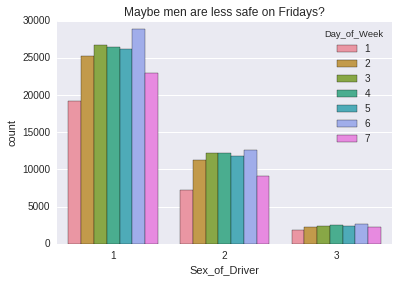

In [80]:
_=sns.countplot(data=dfav, x='Sex_of_Driver', hue='Day_of_Week')
_=plt.title("Maybe men are less safe on Fridays?")
